**NOTEBOOK 4**

### Exercise 04.1

The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

**EQUILIBRATION PHASE**

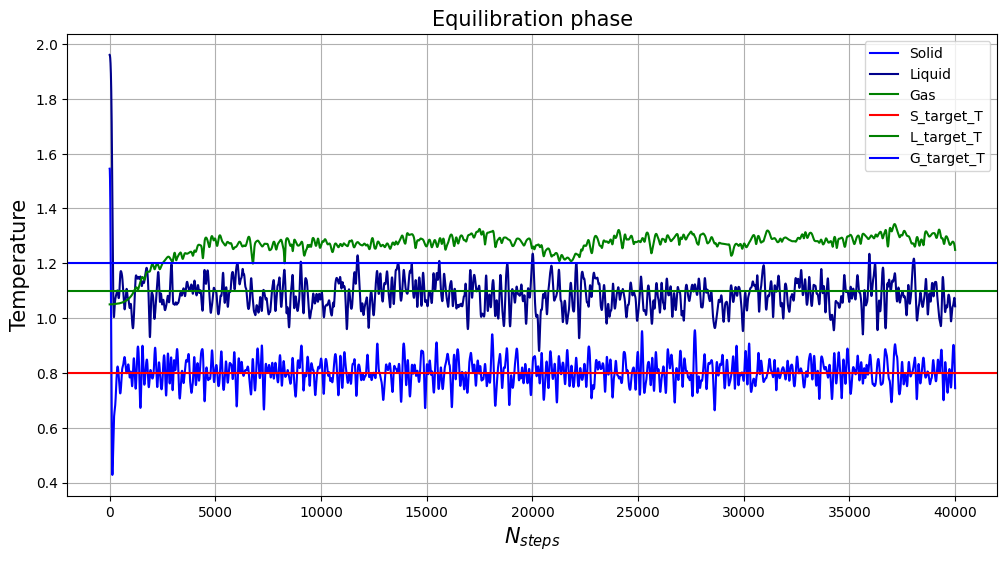

In [1]:
import matplotlib
import matplotlib.pyplot as plt#
import numpy as np
import math
import scipy

M = 40000 #Number of throws
N = 20 #Number of blocks
L = (int)(M/N) #Number of throws per block
x_eq = np.arange(M)
x = np.arange(N)

Teq = [1.2, 1.1, 0.8]

eq_solid = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/EQ_SOLID/equilibr.dat", unpack=True, usecols=(0))
eq_liquid = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/EQ_LIQUID/equilibr.dat",unpack=True, usecols=(0))
eq_gas = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/EQ_GAS/equilibr.dat",unpack=True, usecols=(0))

plt.figure(figsize=(12,6))
plt.plot(x_eq, eq_solid, label="Solid", color="blue")
plt.plot(x_eq, eq_liquid, label="Liquid", color="darkblue")
plt.plot(x_eq, eq_gas, label="Gas", color="g")
plt.axhline(y = Teq[2] , color = 'r', linestyle = '-', label="S_target_T")
plt.axhline(y = Teq[1], color = 'g', linestyle = '-', label="L_target_T")
plt.axhline(y = Teq[0], color = 'b', linestyle = '-', label="G_target_T")
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel("Temperature", fontsize=15)
plt.title("Equilibration phase", fontsize=15)
plt.legend()
plt.grid(True)
plt.show()



**SOLID PHASE**

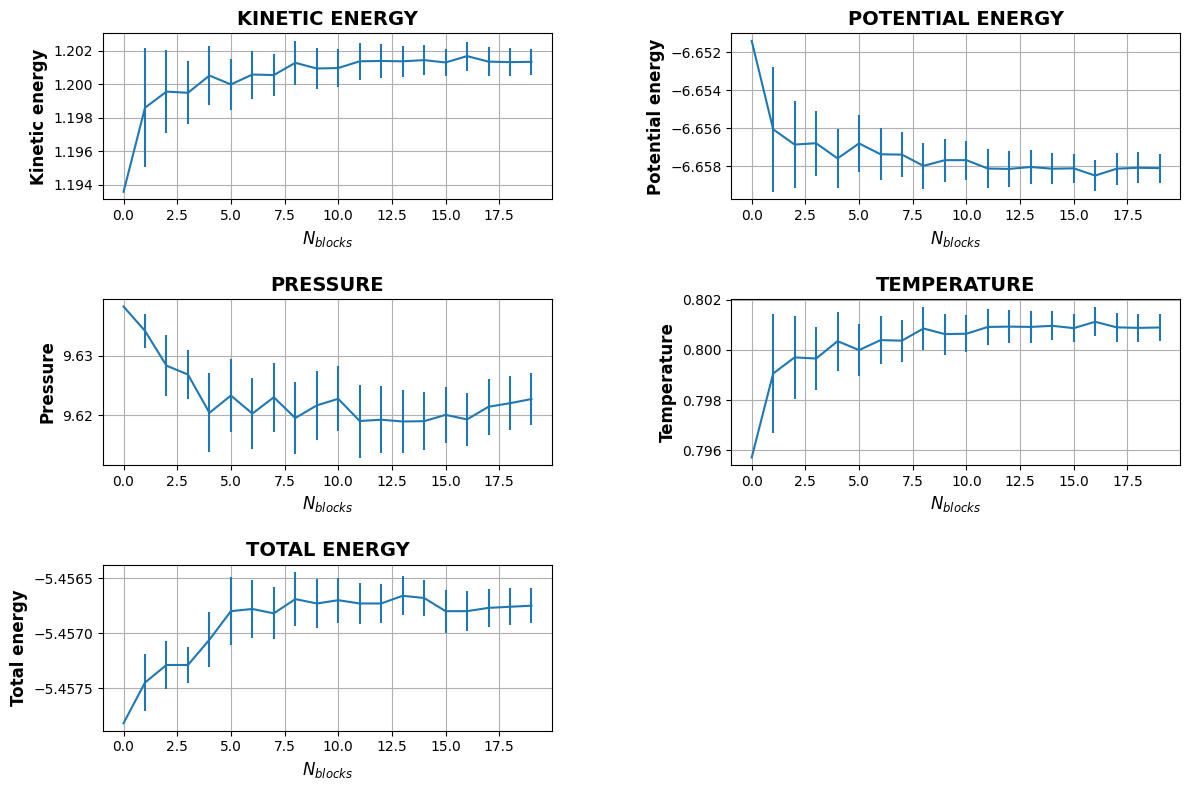

In [2]:
ke_m, ke_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/kinetic_energy.dat", unpack=True, usecols=(2,3))
pe_m, pe_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/potential_energy.dat",unpack=True, usecols=(2,3))
pr_m, pr_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/pressure.dat",unpack=True, usecols=(2,3))
temp_m, temp_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/temperature.dat",unpack=True, usecols=(2,3))
te_m, te_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_SOLID/total_energy.dat",unpack=True, usecols=(2,3))
fig = plt.figure(figsize=(12, 8))

# Primo sottografico: Kinetic Energy
ax_1 = fig.add_subplot(3, 2, 1)
ax_1.errorbar(x, ke_m, yerr=ke_var)
ax_1.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_1.set_ylabel('Kinetic energy', fontsize=12, fontweight='bold')
ax_1.grid(True)
ax_1.set_title("KINETIC ENERGY", fontsize=14, fontweight='bold')

# Secondo sottografico: Potential Energy
ax_2 = fig.add_subplot(3, 2, 2)
ax_2.errorbar(x, pe_m, yerr=pe_var)
ax_2.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_2.set_ylabel('Potential energy', fontsize=12, fontweight='bold')
ax_2.grid(True)
ax_2.set_title("POTENTIAL ENERGY", fontsize=14, fontweight='bold')

# Terzo sottografico: Pressure
ax_3 = fig.add_subplot(3, 2, 3)
ax_3.errorbar(x, pr_m, yerr=pr_var)
ax_3.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_3.set_ylabel('Pressure', fontsize=12, fontweight='bold')
ax_3.grid(True)
ax_3.set_title("PRESSURE", fontsize=14, fontweight='bold')

# Quarto sottografico: Temperature
ax_4 = fig.add_subplot(3, 2, 4)
ax_4.errorbar(x, temp_m, yerr=temp_var)
ax_4.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_4.set_ylabel('Temperature', fontsize=12, fontweight='bold')
ax_4.grid(True)
ax_4.set_title("TEMPERATURE", fontsize=14, fontweight='bold')

# Quinto sottografico: Total Energy
ax_5 = fig.add_subplot(3, 2, 5)
ax_5.errorbar(x, te_m, yerr=te_var)
ax_5.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_5.set_ylabel('Total energy', fontsize=12, fontweight='bold')
ax_5.grid(True)
ax_5.set_title("TOTAL ENERGY", fontsize=14, fontweight='bold')

# Aggiustamento del layout con spaziatura
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # hspace per la spaziatura verticale, wspace per quella orizzontale

# Mostra il grafico
plt.show()

**LIQUID PHASE**

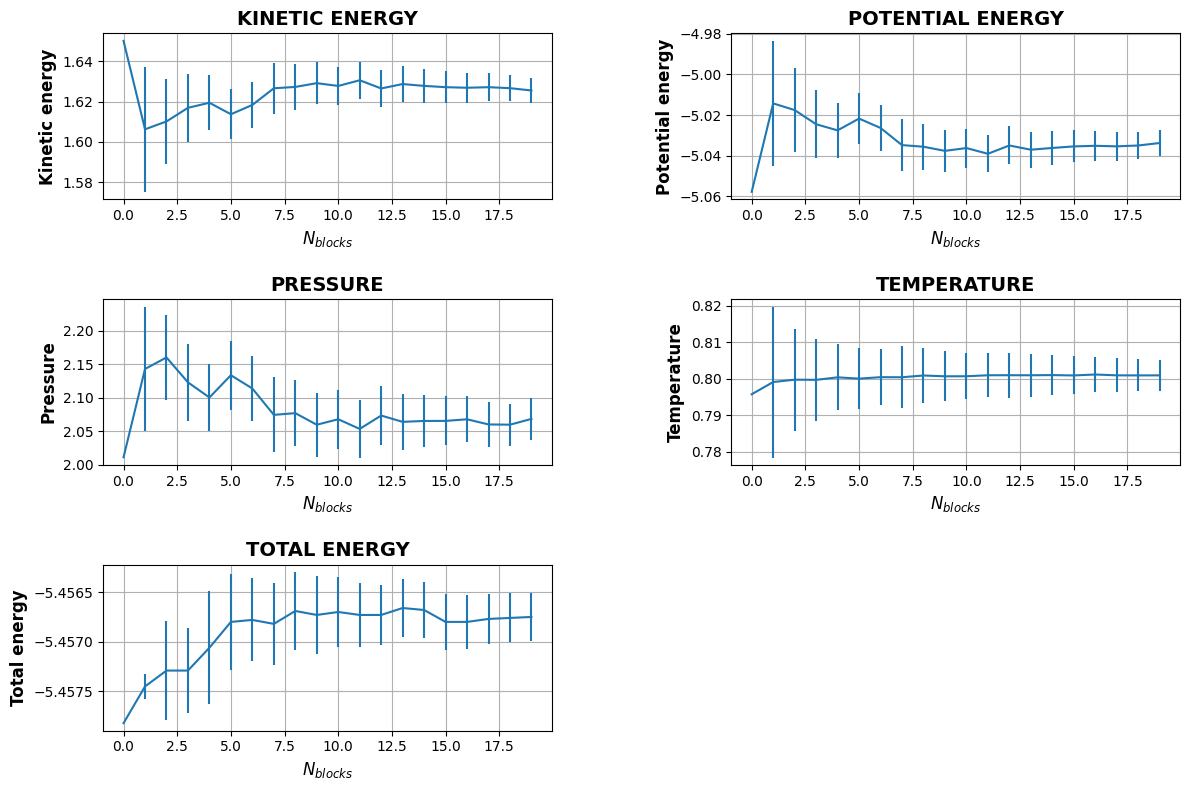

In [3]:
ke_m, ke_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/kinetic_energy.dat", unpack=True, usecols=(2,3))
pe_m, pe_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/potential_energy.dat",unpack=True, usecols=(2,3))
pr_m, pr_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/pressure.dat",unpack=True, usecols=(2,3))
temp_mean, temp_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/temperature.dat",unpack=True, usecols=(2,3))
te_mean, te_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_LIQUID/total_energy.dat",unpack=True, usecols=(2,3))
fig = plt.figure(figsize=(12, 8))

# Primo sottografico: Kinetic Energy
ax_1 = fig.add_subplot(3, 2, 1)
ax_1.errorbar(x, ke_m, yerr=ke_var)
ax_1.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_1.set_ylabel('Kinetic energy', fontsize=12, fontweight='bold')
ax_1.grid(True)
ax_1.set_title("KINETIC ENERGY", fontsize=14, fontweight='bold')

# Secondo sottografico: Potential Energy
ax_2 = fig.add_subplot(3, 2, 2)
ax_2.errorbar(x, pe_m, yerr=pe_var)
ax_2.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_2.set_ylabel('Potential energy', fontsize=12, fontweight='bold')
ax_2.grid(True)
ax_2.set_title("POTENTIAL ENERGY", fontsize=14, fontweight='bold')

# Terzo sottografico: Pressure
ax_3 = fig.add_subplot(3, 2, 3)
ax_3.errorbar(x, pr_m, yerr=pr_var)
ax_3.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_3.set_ylabel('Pressure', fontsize=12, fontweight='bold')
ax_3.grid(True)
ax_3.set_title("PRESSURE", fontsize=14, fontweight='bold')

# Quarto sottografico: Temperature
ax_4 = fig.add_subplot(3, 2, 4)
ax_4.errorbar(x, temp_m, yerr=temp_var)
ax_4.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_4.set_ylabel('Temperature', fontsize=12, fontweight='bold')
ax_4.grid(True)
ax_4.set_title("TEMPERATURE", fontsize=14, fontweight='bold')

# Quinto sottografico: Total Energy
ax_5 = fig.add_subplot(3, 2, 5)
ax_5.errorbar(x, te_m, yerr=te_var)
ax_5.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_5.set_ylabel('Total energy', fontsize=12, fontweight='bold')
ax_5.grid(True)
ax_5.set_title("TOTAL ENERGY", fontsize=14, fontweight='bold')

# Aggiustamento del layout con spaziatura
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # hspace per la spaziatura verticale, wspace per quella orizzontale

# Mostra il grafico
plt.show()

**GAS PHASE**

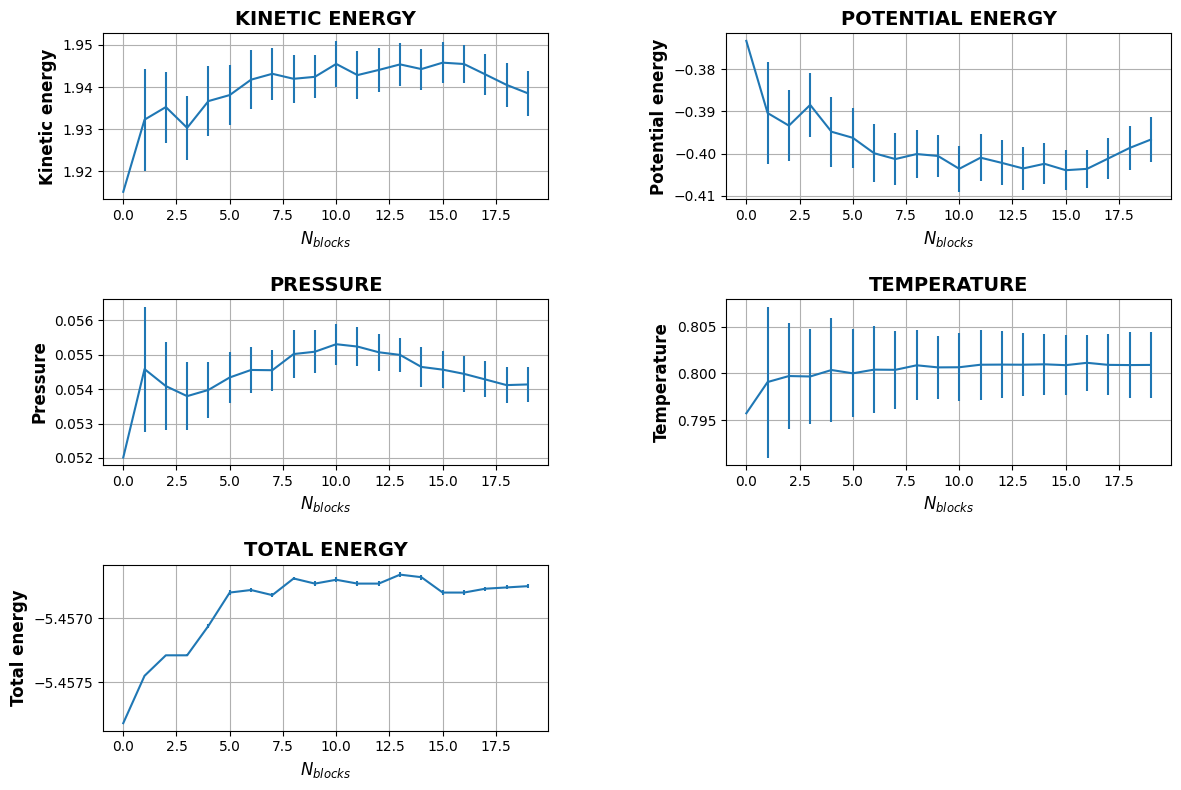

In [4]:
ke_m, ke_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/kinetic_energy.dat", unpack=True, usecols=(2,3))
pe_m, pe_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/potential_energy.dat",unpack=True, usecols=(2,3))
pr_m, pr_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/pressure.dat",unpack=True, usecols=(2,3))
temp_mean, temp_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/temperature.dat",unpack=True, usecols=(2,3))
te_mean, te_var = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_04/exercise_4_02/NSL_SIMULATOR/OUTPUT/OUTPUT_GAS/total_energy.dat",unpack=True, usecols=(2,3))
fig = plt.figure(figsize=(12, 8))

# Primo sottografico: Kinetic Energy
ax_1 = fig.add_subplot(3, 2, 1)
ax_1.errorbar(x, ke_m, yerr=ke_var)
ax_1.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_1.set_ylabel('Kinetic energy', fontsize=12, fontweight='bold')
ax_1.grid(True)
ax_1.set_title("KINETIC ENERGY", fontsize=14, fontweight='bold')

# Secondo sottografico: Potential Energy
ax_2 = fig.add_subplot(3, 2, 2)
ax_2.errorbar(x, pe_m, yerr=pe_var)
ax_2.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_2.set_ylabel('Potential energy', fontsize=12, fontweight='bold')
ax_2.grid(True)
ax_2.set_title("POTENTIAL ENERGY", fontsize=14, fontweight='bold')

# Terzo sottografico: Pressure
ax_3 = fig.add_subplot(3, 2, 3)
ax_3.errorbar(x, pr_m, yerr=pr_var)
ax_3.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_3.set_ylabel('Pressure', fontsize=12, fontweight='bold')
ax_3.grid(True)
ax_3.set_title("PRESSURE", fontsize=14, fontweight='bold')

# Quarto sottografico: Temperature
ax_4 = fig.add_subplot(3, 2, 4)
ax_4.errorbar(x, temp_m, yerr=temp_var)
ax_4.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_4.set_ylabel('Temperature', fontsize=12, fontweight='bold')
ax_4.grid(True)
ax_4.set_title("TEMPERATURE", fontsize=14, fontweight='bold')

# Quinto sottografico: Total Energy
ax_5 = fig.add_subplot(3, 2, 5)
ax_5.errorbar(x, te_m, yerr=te_var)
ax_5.set_xlabel('$N_{blocks}$', fontsize=12, fontweight='bold')
ax_5.set_ylabel('Total energy', fontsize=12, fontweight='bold')
ax_5.grid(True)
ax_5.set_title("TOTAL ENERGY", fontsize=14, fontweight='bold')

# Aggiustamento del layout con spaziatura
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # hspace per la spaziatura verticale, wspace per quella orizzontale

# Mostra il grafico
plt.show()